In [24]:
import numpy as np
import rasterio
from sklearn.preprocessing import normalize

In [170]:
with rasterio.open(r'H:\data\EuroSATallBands\ds\images\remote_sensing\otherDatasets\sentinel_2\tif\AnnualCrop\AnnualCrop_1.tif', 'r+') as r:
    image = r.read().astype('float32') 
    for j in np.arange(image.shape[0]):
        image[j] = normalize(image[j,:,:], norm='max')


In [171]:
image.shape

(13, 64, 64)

In [172]:
image[7]

array([[0.92774963, 0.92774963, 0.91992635, ..., 0.62954444, 0.64012885,
        0.6171192 ],
       [0.92774963, 0.92774963, 0.91992635, ..., 0.62954444, 0.64012885,
        0.6171192 ],
       [0.8945921 , 0.8945921 , 0.89963335, ..., 0.6296975 , 0.63565534,
        0.6209899 ],
       ...,
       [1.        , 1.        , 0.9255692 , ..., 0.58099824, 0.5753065 ,
        0.5836252 ],
       [1.        , 1.        , 0.92304146, ..., 0.6511521 , 0.63963133,
        0.6465438 ],
       [1.        , 1.        , 0.86374134, ..., 0.6605081 , 0.6531178 ,
        0.6595843 ]], dtype=float32)

(-0.5, 63.5, 63.5, -0.5)

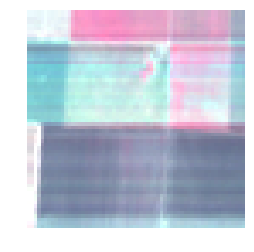

In [167]:
sample = image[[7,3,2],:,:]
sample = np.transpose(sample, [1,2,0])
plt.imshow(sample)
plt.axis('off')


(-0.5, 63.5, 63.5, -0.5)

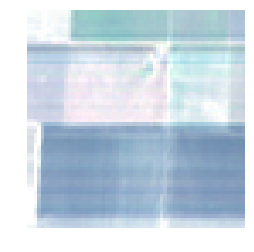

In [168]:
sample = image[[3,2,1],:,:] 
sample = np.transpose(sample, [1,2,0])
plt.imshow(sample)
plt.axis('off')

In [211]:
import os
from glob import glob

path = r"H:\data\EuroSATallBands\ds\images\remote_sensing\otherDatasets\sentinel_2\tif"
geotiffs = [y for x in os.walk(path) for y in glob(os.path.join(x[0], '*.tif'))]

In [212]:
len(geotiffs)

27000

In [213]:
from numpy import zeros, newaxis

x = zeros((13, 64, 64,1))
batch = zeros((13, 64, 64, len(geotiffs)))
i = 0

In [ ]:
for geotiff in geotiffs:
    with rasterio.open(geotiff, 'r+') as g:
        image = g.read().astype('float32') 
        for j in np.arange(image.shape[0]):
            image[j] = normalize(image[j,:,:], norm='max')
        #batch = np.append(batch, image[..., newaxis], axis=3)
        batch[:,:,:,i] = image
        i = i + 1

In [209]:
batch.shape

(13, 64, 64, 3)